## PCA and Senate Voting Data


In [23]:
# Import the necessary packages for data manipulation, computation and PCA 
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [35]:
senator_df =  pd.read_csv('senator_data_pca/data_matrix.csv')
affiliation_file = open("senator_data_pca/politician_labels.txt", "r")
affiliations = [line.split('\n')[0].split(' ')[1] for line in affiliation_file.readlines()]
X = np.array(senator_df.values[:, 3:].T, dtype='float64') #transpose to get senators as rows

In [25]:
#Center the matrix for PCA
X = X.T
X_bar = X.mean(axis=1)
for i in range(X.shape[1]):
    X[:, i] = X[:, i] - X_bar

In [26]:
#Prepare PCA
pca = PCA(n_components=2)
pca.fit(X)
a = pca.components_[0]
a2 = pca.components_[1]

In [27]:
# Finding the maximum variance
b = 0
f = lambda x : np.dot(a, x) + b
print(np.var([f(x) for x in X]))

27.57876644236412


In [28]:
# Comparing it to the variance with a set to center and b set so that the average score is zero
a_prev = X.mean(axis=0)
b = -np.mean([np.dot(a_prev, i) for i in X])
g = lambda x : np.dot(a_prev, x) + b
print(np.var([g(x) for x in X]))

6.347134605719346


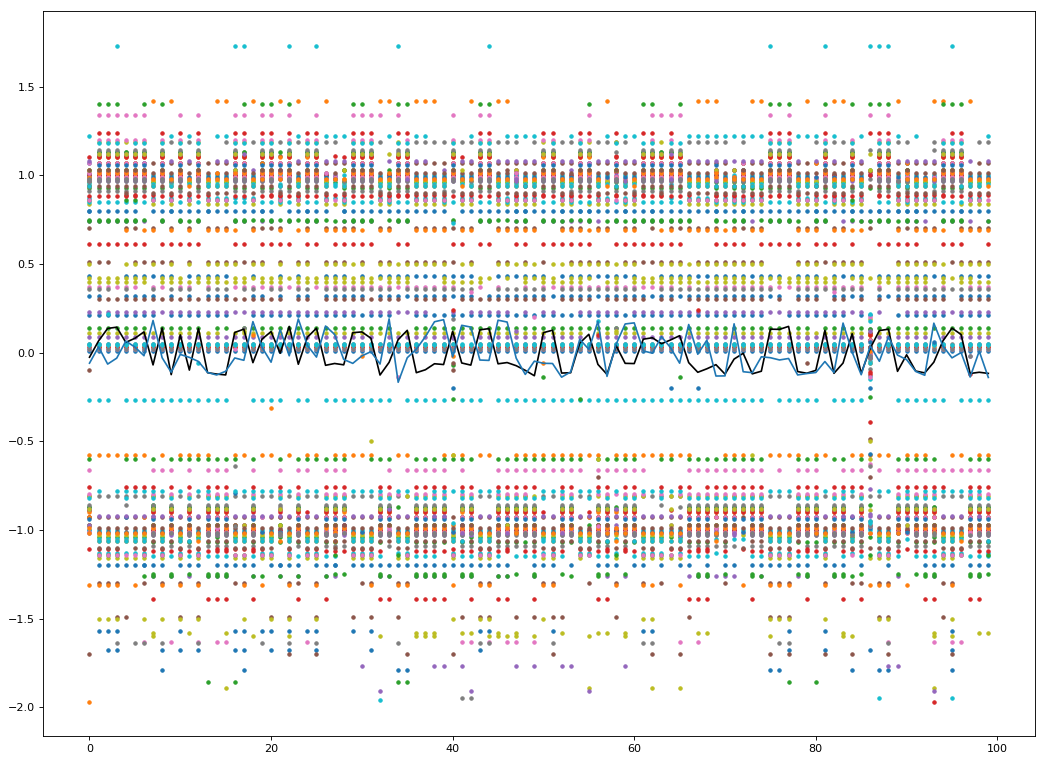

In [29]:
# Total variance of the first two principal components
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
plt.plot(np.array([[i, j] for i, j in list(enumerate(a))]).T[0], np.array([[i, j] for i, j in list(enumerate(a))]).T[1], color='black')
plt.plot(np.array([[i, j] for i, j in list(enumerate(a2))]).T[0], np.array([[i, j] for i, j in list(enumerate(a2))]).T[1])
_ = [plt.scatter(np.array([[i, j] for i, j in list(enumerate(X[i]))]).T[0], np.array([[i, j] for i, j in list(enumerate(X[i]))]).T[1], marker='.') for i in range(100)]